In [8]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn import svm
import sys
# sys.path.append('/home/ralfahad/PythonUtility/PTE')
# from PhaseTE_MF import PhaseTE_MF
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import warnings
from sklearn import svm, metrics,preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc,classification_report
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# from sklearn import metrics
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Load the metadata
# path='/home/sultan/EEG/Source_Level_Analysis/25sam_10ms_clear_all_erp.csv'
# path="/home/sultan/EEG/Source_Level_Analysis/50tr10ms_all_clear_erp.csv"
path="/home/sultan/EEG/Source_Level_Analysis/75sam_10ms_clear_all_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_clear_all_erp.csv"
Metadata=pd.read_csv(path)
Metadata.head(2)

,Unnamed: 0,label,0,1,2,3,4,5,6,7,...,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427
0,0,0.0,5.756512e-10,3.006080e-10,-2.025285e-11,-9.217269e-11,-1.537829e-10,-9.745518e-12,-1.575766e-10,-8.125790e-11,...,2.068896e-10,1.122380e-10,-2.321731e-10,2.295514e-10,1.884469e-10,1.411350e-10,-1.449544e-10,2.953361e-10,-9.752876e-11,-1.700103e-10
1,1,0.0,2.296048e-10,6.107766e-10,2.390374e-10,2.158895e-10,-3.573276e-10,-2.391143e-10,3.200366e-11,-1.481967e-10,...,-1.224801e-10,1.753003e-10,-6.341912e-11,-3.838900e-11,9.588576e-11,1.989337e-10,5.321058e-11,1.672333e-10,-1.012166e-10,-1.499602e-10


In [3]:
X=Metadata.iloc[:,2:]
y=Metadata['label']
X.shape,y.shape

((2505, 1428), (2505,))

# Apply SVM on Data

In [4]:
gamma_range = np.logspace(-2, 2, 5)
gamma_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [60]:
from sklearn import preprocessing
# X=preprocessing.scale(X)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

#C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
C_range = np.logspace(-2, 2, 5)
#gamma_range = np.logspace(-2, 2, 5)

print C_range,gamma_range


(2505, 1428) (2505, 1)
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02] [0.01, 0.002, 0.00069, 0.0007, 0.0005]


In [61]:
#Classifiaction:
# #Splitting
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
cv = ShuffleSplit(X_train.shape[0], test_size=0.20, random_state=42)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
C_range = np.logspace(-2, 2, 5)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
param_grid = dict(gamma=gamma_range, C=C_range)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
clf_Tune.fit(X_train,y_train)
print 'Finish tuning'      

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  6.7min finished


Finish tuning


In [64]:
y_p = clf_Tune.best_estimator_.predict(X_test)
ACC=classification_report(y_test, y_p)
print ACC
ACC_AVG=accuracy_score(y_test, y_p)
print ACC_AVG
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
AUC_Th2_T=metrics.auc(fpr, tpr)
print AUC_Th2_T

             precision    recall  f1-score   support

          0       0.89      0.92      0.90       203
          1       0.94      0.92      0.93       298

avg / total       0.92      0.92      0.92       501

0.9201596806387226
0.9195374747908883


In [65]:
y_p=clf_Tune.best_estimator_.predict(X_test)
print "Accuracy:", clf_Tune.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf_Tune.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.9201596806387226
support: 56.8363273453


In [69]:
# print 'Validation accuracy={}, best {}' .format(clf_Tune.best_score_,clf_Tune.best_params_)
clf_Tune.best_params_
# clf_Tune.best_estimator_

{'C': 10.0, 'gamma': 0.0005}

In [63]:
# # Utility function to move the midpoint of a colormap to be around
# # the values of interest.
# from matplotlib.colors import Normalize
# class MidpointNormalize(Normalize):

#     def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
#         self.midpoint = midpoint
#         Normalize.__init__(self, vmin, vmax, clip)

#     def __call__(self, value, clip=None):
#         x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
#         return np.ma.masked_array(np.interp(value, x, y))
    
# scores = clf_Tune.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
# #print scores.shape,len(C_range),len(gamma_range)
# plt.figure(figsize=(8, 6))
# #plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
# plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
# plt.xlabel('gamma')
# plt.ylabel('C')
# plt.colorbar()
# plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
# plt.yticks(np.arange(len(C_range)), C_range)
# plt.title('Validation accuracy={}, best {}' .format(clf_Tune.best_score_,clf_Tune.best_params_))

# #filename='ParameterTuning'
# #save_format='png'
# #print filename+'.'+save_format
# #pp='home/ralfahad/Pictures'
# #plt.savefig(filename+'.'+save_format,dpi=100)
# #plt.show()

# Find Significant correlation with stability selections 

### Make the dataset

In [76]:
# Pre Processing 
X[0,:]

array([ 0.89165901,  0.35601844,  0.26112067, ...,  0.77466551,
       -0.01077439, -0.30849701])

In [77]:
from sklearn import preprocessing
X=preprocessing.scale(X)
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

(2505, 1428) (2505, 1)


In [81]:
# np.var(X[:,1])

### Randomized Logistic Regression 

In [14]:
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path,LassoLarsCV)
from sklearn.exceptions import ConvergenceWarning

#Model Library
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path, LassoLarsCV)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RandomizedLogisticRegression
from sklearn import svm

# Performance analysis library 
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut, cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split # test train split
from sklearn.model_selection import ShuffleSplit

In [15]:
with warnings.catch_warnings():
    #warnings.simplefilter('ignore', UserWarning)
    warnings.simplefilter('ignore', ConvergenceWarning)
    lars_cv = LassoLarsCV(cv=5).fit(X, y)
lars_cv.alphas_

array([0.0030993])

In [16]:
# Run the RandomizedLasso: we use a paths going down to .1*alpha_max
# to avoid exploring the regime in which very noisy variables enter
# the model
alphas = np.linspace(lars_cv.alphas_[0], .1 * lars_cv.alphas_[0], 10)
print alphas
clf = RandomizedLasso(alpha=alphas, random_state=42,max_iter=10000).fit(X, y)

[0.0030993  0.00278937 0.00247944 0.00216951 0.00185958 0.00154965
 0.00123972 0.00092979 0.00061986 0.00030993]


In [17]:
clf.scores_

array([0.02, 0.  , 0.02, ..., 0.26, 0.01, 0.  ])

In [18]:
# # Rank the Features according to the importance
# names=range(0,1428) # Feature names used as 1-1428 features
# cn=np.asarray(names) # converted as numpy.ndarray
# # print "Features sorted by their score:"
# b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
# bb=np.asarray(b)
# rakfe=bb[bb[:,0]>0.34]
# ROIs=rakfe[:,1]%68

In [19]:
# # print "Features sorted by their score:"
# b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), 
#                  cn), reverse=True)

In [20]:
# bb=np.asarray(b)
# # rf=np.where(bb[:,0]>0.7)
# # ifea=np.squeeze(np.asarray(np.where(clf.scores_>=0.815)))
# ra=bb[bb[:,0]>0.50]
# # r=bb[e]
# ra[:,1]%68

In [21]:
# ind=np.where(clf.scores_>=0.710)
# ind

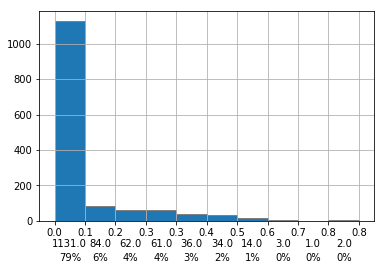

In [22]:
from matplotlib.ticker import FormatStrFormatter
data=clf.scores_
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.grid(True)
plt.show()

### Find the optimal threshold

In [23]:
Th_2_Bins_Index= np.where((bins<=0.9) & (bins>=0.1)) # take the bins within a range
print bins
Th_2_Bins=bins[Th_2_Bins_Index]
print Th_2_Bins

[0.    0.085 0.17  0.255 0.34  0.425 0.51  0.595 0.68  0.765 0.85 ]
[0.17  0.255 0.34  0.425 0.51  0.595 0.68  0.765 0.85 ]


In [24]:
from sklearn import preprocessing
X=preprocessing.scale(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(2505, 1428) (2505, 1)
(2004, 1428) (501, 1428) (2004, 1) (501, 1)


In [25]:
X_train[:,1:10]

array([[-0.97842941, -0.36256093, -0.22968189, ..., -0.56564921,
         0.63315685,  0.70718718],
       [-0.80974085,  0.7570106 ,  0.8633231 , ..., -0.4106403 ,
        -0.01264382,  0.65907589],
       [-0.22180594,  0.08964881,  0.10612725, ..., -0.1414588 ,
        -1.30485908, -0.37145477],
       ...,
       [ 1.57101502, -0.55443941, -0.53037427, ..., -0.91185362,
         1.92115736,  1.25293235],
       [-0.2771395 ,  0.33689231,  0.14707153, ...,  0.95417762,
         0.87449887,  1.53960091],
       [-0.74388513,  2.78745407,  2.43792094, ...,  1.15237855,
        -1.13188579, -2.03577938]])

In [26]:
type(X_train)#[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.16)))].shape#,y_train

numpy.ndarray

In [27]:
C_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
# gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.16)))],y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   41.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': [0.01, 0.002, 0.00069, 0.0007, 0.0005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [28]:
# use tuned parameter on to get model
y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.16)))])

print accuracy_score(y_test, y_p)

0.9241516966067864


In [29]:
# #Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=42)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
# C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-9, 3, 13)

C_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
#gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
##  Define LeaveOneOutCrossValidation
#loocv = LeaveOneOut()
ACC_Th2=[]
AUC_Th2=[]
Bins=[]
for i in Th_2_Bins:
    print i
    try:
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        
        #Hyper parameter Tuning 
        clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))],y_train)
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape ,y_train.shape
        print 'Finish tuning'

        # use tuned parameter on to get model
        y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

        ACC_Th2_T=accuracy_score(y_test, y_p)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
        AUC_Th2_T=metrics.auc(fpr, tpr)
        print 'Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        print 'ACC',ACC_Th2_T,AUC_Th2_T
        ACC_Th2.append(ACC_Th2_T)
        AUC_Th2.append(AUC_Th2_T)
        Bins.append(i)
    except:
        print 'error at:',i
    # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
    # roc_auc_T = auc(false_positive_rate, true_positive_rate)
    # print 'AUC',roc_auc_T
    # AUC_Th2.append(roc_auc_T)

0.16999999999999998
(2004, 213)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   40.4s finished


(2004, 213) (2004, 1)
Finish tuning
Shape (501, 213)
ACC 0.9181636726546906 0.9155040169272985
0.255
(2004, 151)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   29.8s finished


(2004, 151) (2004, 1)
Finish tuning
Shape (501, 151)
ACC 0.9001996007984032 0.8972625384335637
0.33999999999999997
(2004, 90)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   20.7s finished


(2004, 90) (2004, 1)
Finish tuning
Shape (501, 90)
ACC 0.8942115768463074 0.8906585777101861
0.42499999999999993
(2004, 54)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   14.8s finished


(2004, 54) (2004, 1)
Finish tuning
Shape (501, 54)
ACC 0.8762475049900199 0.8747727047310477
0.51
(2004, 20)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   10.3s finished


(2004, 20) (2004, 1)
Finish tuning
Shape (501, 20)
ACC 0.8043912175648703 0.8041623962707045
0.595
(2004, 6)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    8.6s finished


(2004, 6) (2004, 1)
Finish tuning
Shape (501, 6)
ACC 0.6946107784431138 0.6773316361953252
0.6799999999999999
(2004, 3)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    8.0s finished


(2004, 3) (2004, 1)
Finish tuning
Shape (501, 3)
ACC 0.6467065868263473 0.5883806658511588
0.7649999999999999
(2004, 2)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.9s finished


(2004, 2) (2004, 1)
Finish tuning
Shape (501, 2)
ACC 0.5888223552894212 0.5295153238337685
0.85
(2004,)
Fitting 5 folds for each of 25 candidates, totalling 125 fits
error at: 0.85


In [34]:
# accuracy_score(y_test, y_p)
# MulticlassAuc(y_test,y_p)

In [35]:
        
#         ACC_Th2_T=accuracy_score(y_test, y_p)
#         AUC_Th2_T=MulticlassAuc(y_test,y_p)
#         print 'Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
#         print 'ACC',ACC_Th2_T,AUC_Th2_T
#         ACC_Th2.append(ACC_Th2_T)
#         AUC_Th2.append(AUC_Th2_T)
#         Bins.append(i)
#     except:
#         print 'error at:',i
#     # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
#     # roc_auc_T = auc(false_positive_rate, true_positive_rate)
#     # print 'AUC',roc_auc_T
#     # AUC_Th2.append(roc_auc_T)

In [30]:
ACC_Th2 

[0.9181636726546906,
 0.9001996007984032,
 0.8942115768463074,
 0.8762475049900199,
 0.8043912175648703,
 0.6946107784431138,
 0.6467065868263473,
 0.5888223552894212]

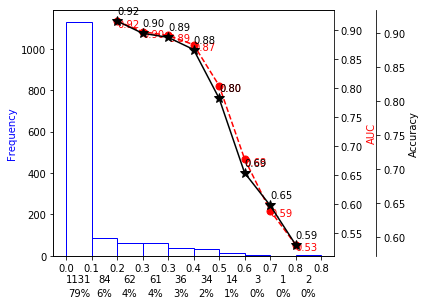

In [31]:
from matplotlib.ticker import FormatStrFormatter
Th_2_Bins=np.asarray(Bins)
data=clf.scores_
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)
#counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')
counts, bins, patches = ax.hist(data,10,facecolor="None",edgecolor='blue', lw=1)
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


bin_centers = 0.5 * np.diff(bins) + bins[:-1]







#show % value
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(int(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')



    
    
    
    # Give ourselves some more room at the bottom of the plot

ax2 = ax.twinx()
ax2.plot(Th_2_Bins,AUC_Th2, color='red',ls='dashed' )#,THbin,CCC_Per)
ax2.set_frame_on(False)
ax2.set_ylabel('AUC', color='red')
ax2.patch.set_visible(False)
for i,j in zip(Th_2_Bins,AUC_Th2):
    #ax2.annotate(("%.2f" % j),xy=(i+0.04,j-0.01), color ='red') ##############################
    ax2.annotate(("%.2f" % j),xy=(i,j-0.01), color ='red') ##############################
    ax2.plot(i,j, marker='o', markersize=7, color="red")


    
ax3 = ax.twinx()
ax3.plot(Th_2_Bins,ACC_Th2, color='black')#,THbin,CCC_Per)
ax3.set_frame_on(False)
ax3.set_ylabel('Accuracy', color='black')






for i,j in zip(Th_2_Bins,ACC_Th2):
     #ax3.annotate(("%0.2f" % j),xy=(i-0.05,j), color='black')
    #ax3.annotate(("%0.2f" % j),xy=(i-0.1,j), color='black')##################################
    ax3.annotate(("%0.2f" % j),xy=(i,j+0.01), color='black')##################################
    ax3.plot(i,j, marker='*', markersize=10, color="black")
    #ax3.annotate(("%0.2f,%0.2f" % (i,j)),xy=(i-0.05,j), color='green')
    #ax3.annotate(("%0.3f" %j),xy=(i,j), color='green')


    
    
    
    
# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.15))
ax3.spines['right'].set_visible(True)

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)


#ax.plot(bins,np.linspace(0,1,11))
plt.subplots_adjust(bottom=0.15)
plt.grid(False,which='both')
ax.set_ylabel('Frequency')
ax.yaxis.label.set_color('Blue')
plt.tight_layout()
# #Save the image

filename='Corr_StabilitySelection_TH2'
save_format='png'
#print filename+'.'+save_format
#pp='home/ralfahad/Pictures'
#plt.savefig(filename+'.'+save_format,dpi=100)
plt.savefig(filename+'.'+save_format,dpi=300, bbox_inches='tight')
plt.show()



In [32]:
# for i,j in zip(Th_2_Bins,AUC_Th2):
#     print i,j
All_ACC=[]
All_AUC=[]
ALL_Bins=[]
NumberofElement=[]
for i,j,k in zip(Th_2_Bins,ACC_Th2,AUC_Th2):
    Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=i)))
    print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index)
    NumberofElement.append(len(Th2Index))
    ALL_Bins.append("{0:.2f}".format(i))
    All_ACC.append("{0:.2f}".format(j))
    All_AUC.append("{0:.2f}".format(k))

Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
           pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement)],axis=1)
Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle']
Selected_Feature_Result

0.17 0.92 0.92 213
0.26 0.90 0.90 151
0.34 0.89 0.89 90
0.42 0.88 0.87 54
0.51 0.80 0.80 20
0.59 0.69 0.68 6
0.68 0.65 0.59 3
0.76 0.59 0.53 2


,Threshold,ACC,AUC,NoEle
0,0.17,0.92,0.92,213
1,0.26,0.90,0.90,151
2,0.34,0.89,0.89,90
3,0.42,0.88,0.87,54
4,0.51,0.80,0.80,20
5,0.59,0.69,0.68,6
6,0.68,0.65,0.59,3
7,0.76,0.59,0.53,2


In [33]:
# Need to chage gamma range . It is selecting too many features

# Let 0.34 is our best Thr. TO get the index numer with this thr


fealoc=np.squeeze(np.asarray(np.where(clf.scores_>=0.34)))
fealoc

# Do you get it? yes > How about number of support of the model?

array([  14,   58,   62,  126,  140,  148,  154,  157,  178,  180,  184,
        201,  217,  229,  238,  248,  262,  269,  272,  311,  321,  326,
        337,  338,  345,  361,  370,  389,  405,  438,  461,  462,  472,
        473,  476,  491,  497,  499,  526,  590,  598,  605,  609,  633,
        658,  659,  689,  694,  740,  752,  762,  801,  808,  820,  821,
        843,  859,  871,  887,  933,  938,  939,  942,  996, 1006, 1024,
       1040, 1068, 1092, 1102, 1136, 1156, 1157, 1170, 1171, 1177, 1190,
       1195, 1206, 1218, 1228, 1229, 1237, 1238, 1352, 1356, 1374, 1420,
       1422, 1424])

In [34]:
ROI=fealoc%68
ROI
np.unique(ROI,return_counts=True)

(array([ 0,  1,  3,  4,  5,  9, 12, 13, 14, 15, 18, 20, 21, 23, 25, 27, 30,
        34, 39, 42, 43, 44, 46, 47, 48, 49, 50, 53, 54, 55, 58, 60, 61, 62,
        64, 65, 66]),
 array([3, 1, 1, 6, 3, 1, 1, 2, 7, 2, 1, 1, 5, 1, 1, 1, 2, 2, 2, 1, 1, 3,
        2, 1, 3, 3, 2, 2, 5, 2, 4, 4, 1, 3, 3, 6, 1]))

In [35]:
len(np.unique(ROI))
# np.unique(ROI,return_counts=True)

37

In [45]:
for th in [0.17, 0.26,0.34,0.42]:
    clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))],y_train)
    print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape ,y_train.shape
    print 'Finish tuning'
    print float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape[0]*100
# use tuned parameter on to get model
#y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   40.4s finished


(2004, 213) (2004, 1)
Finish tuning
42.0159680639
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   28.9s finished


(2004, 146) (2004, 1)
Finish tuning
65.0698602794
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   20.7s finished


(2004, 90) (2004, 1)
Finish tuning
48.3033932136
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   15.4s finished


(2004, 58) (2004, 1)
Finish tuning
36.876247505


In [37]:
# float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.25)))].shape[0]*100

36.87624750499002

In [38]:
# result it overfitting need to be less or equal to 40%

# Rank the Feature Vectors as their importance

In [58]:
# Rank the Features according to the importance
names=range(0,1428) # Feature names used as 1-1428 features
cn=np.asarray(names) # converted as numpy.ndarray
# print "Features sorted by their score:"
b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
bb=np.asarray(b)
rakfe=bb[bb[:,0]>=0.34]
ROIs=rakfe[:,1]%68

In [59]:
ROI
print np.unique(ROI,return_counts=True)
print len(np.unique(ROIs))

(array([ 0,  1,  3,  4,  5,  9, 12, 13, 14, 15, 18, 20, 21, 23, 25, 27, 30,
       34, 39, 42, 43, 44, 46, 47, 48, 49, 50, 53, 54, 55, 58, 60, 61, 62,
       64, 65, 66]), array([3, 1, 1, 6, 3, 1, 1, 2, 7, 2, 1, 1, 5, 1, 1, 1, 2, 2, 2, 1, 1, 3,
       2, 1, 3, 3, 2, 2, 5, 2, 4, 4, 1, 3, 3, 6, 1]))
37


In [41]:
ROIs

array([65., 13., 65., 49., 58., 48.,  0.,  0.,  5.,  0.,  5., 39., 50.,
       43., 15.,  4., 23., 34., 62., 64., 58., 47., 65., 64., 14., 49.,
        4.,  4., 53., 15., 66., 39., 62., 21., 27., 61., 65., 30., 64.,
        1., 48.,  4., 50., 58., 14., 14., 21., 42., 48., 44.,  3., 60.,
       18., 30., 55., 54., 60., 46.,  9., 54., 54., 25., 60., 44., 54.,
       14.,  5., 12., 65., 13.,  4., 58., 46., 14., 55., 21., 49., 54.,
       14., 53., 21., 60., 20., 44.,  4., 14., 21., 62., 34., 65.])

In [42]:
Roiname=pd.read_csv("/home/sultan/EEG/Source_Level_Analysis/DK_atlas_Visualize_index_v1.csv")

In [43]:
shdkroi=Roiname['Desikan_Freesurfer_v5.1']
sdk=shdkroi[ROIs]
sdk.head(15)

65.0      rTP
13.0     rFUS
65.0      rTP
49.0     rPRC
58.0      lSP
48.0     lPRC
0.0      lBKS
0.0      lBKS
5.0      rCMF
0.0      lBKS
5.0      rCMF
39.0     rPOB
50.0    lPREC
43.0    rPERI
15.0      rIP
Name: Desikan_Freesurfer_v5.1, dtype: object

In [44]:
dkfull=Roiname['BrainMesh_ICBM152.nv']
dk=dkfull[ROIs]
dk.head(15)

65.0           temporalpole R
13.0               fusiform R
65.0           temporalpole R
49.0             precentral R
58.0       superiorparietal L
48.0             precentral L
0.0                bankssts L
0.0                bankssts L
5.0     caudalmiddlefrontal R
0.0                bankssts L
5.0     caudalmiddlefrontal R
39.0          parsorbitalis R
50.0              precuneus L
43.0          pericalcarine R
15.0       inferiorparietal R
Name: BrainMesh_ICBM152.nv, dtype: object

In [155]:
# rakfe

In [45]:
a=[0,1,7,8,68,1427]
b=np.array(a)
b%68

array([ 0,  1,  7,  8,  0, 67])